# Importing Libraries

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


# Data Import

In [4]:
dfw=pd.read_csv('Dataset/Basel/Weather20250710T211854.csv')

dfw.head()

,timestamp,Basel Temperature [2 m elevation corrected],Basel Precipitation Total,Basel Cloud Cover Total,Basel Cloud Cover High [high cld lay],Basel Cloud Cover Medium [mid cld lay],Basel Cloud Cover Low [low cld lay],Basel Shortwave Radiation,Basel Longwave Radiation,Basel UV Radiation,Basel Mean Sea Level Pressure [MSL]
0,20050101T0000,4.340245,0.2,96.0,2.0,55.0,96.0,0.0,328.0,0.0,1030.1
1,20050101T0100,4.520246,0.2,100.0,0.0,45.0,100.0,0.0,329.0,0.0,1029.4
2,20050101T0200,4.460246,0.0,100.0,0.0,30.0,100.0,0.0,328.0,0.0,1029.7
3,20050101T0300,4.430245,0.0,100.0,0.0,28.0,100.0,0.0,326.0,0.0,1029.5
4,20050101T0400,4.390245,0.1,100.0,0.0,23.0,100.0,0.0,325.0,0.0,1029.5


In [5]:
dfp=pd.read_csv('Dataset/Basel/WeatherXPVPG2005_2023 (1).csv')
dfp.head()

,time,P,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
0,20050101:0010,0.0,0.0,0.0,0.0,0.0,2.44,1.86,0.0
1,20050101:0110,0.0,0.0,0.0,0.0,0.0,2.56,1.86,0.0
2,20050101:0210,0.0,0.0,0.0,0.0,0.0,2.58,1.79,0.0
3,20050101:0310,0.0,0.0,0.0,0.0,0.0,2.53,1.72,0.0
4,20050101:0410,0.0,0.0,0.0,0.0,0.0,2.48,1.66,0.0


In [6]:
dfp=dfp.drop(columns=["Int"])  # drop int : all values are 0

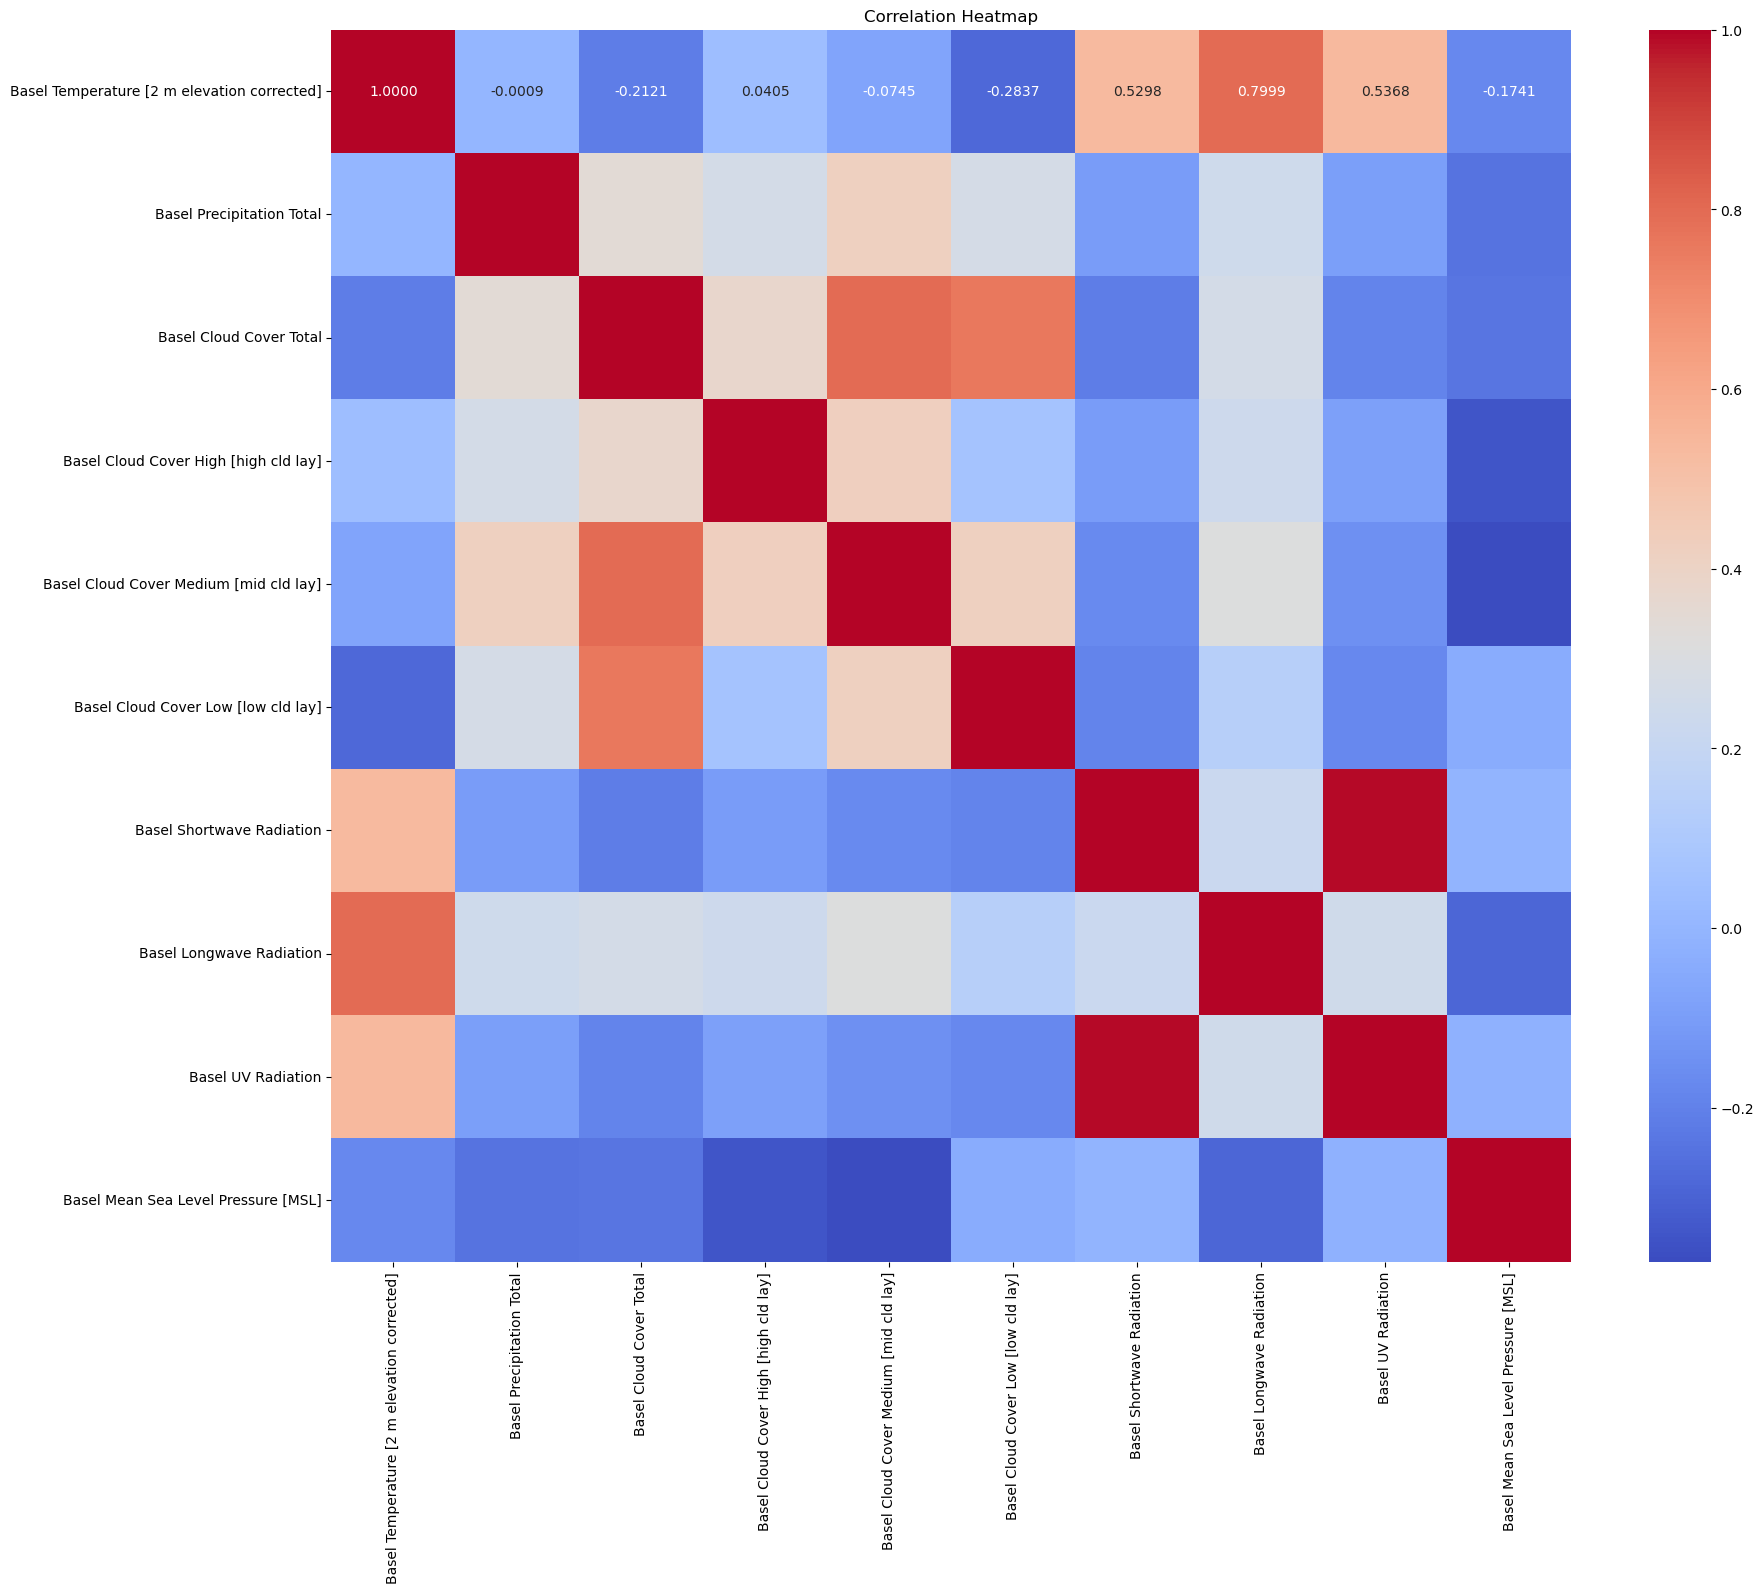

In [7]:
import seaborn as sns
dfgg=dfw.drop(columns=['timestamp'])
# Compute correlation matrix
corr = dfgg.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Heatmap')
plt.show()

Merging Both Datasets

Formating Timestamps

In [8]:
dfw['timestamp'] = pd.to_datetime(dfw['timestamp'], format="%Y%m%dT%H%M")


In [9]:
dfw

,timestamp,Basel Temperature [2 m elevation corrected],Basel Precipitation Total,Basel Cloud Cover Total,Basel Cloud Cover High [high cld lay],Basel Cloud Cover Medium [mid cld lay],Basel Cloud Cover Low [low cld lay],Basel Shortwave Radiation,Basel Longwave Radiation,Basel UV Radiation,Basel Mean Sea Level Pressure [MSL]
0,2005-01-01 00:00:00,4.340245,0.2,96.0,2.0,55.0,96.0,0.0,328.0,0.0,1030.1
1,2005-01-01 01:00:00,4.520246,0.2,100.0,0.0,45.0,100.0,0.0,329.0,0.0,1029.4
2,2005-01-01 02:00:00,4.460246,0.0,100.0,0.0,30.0,100.0,0.0,328.0,0.0,1029.7
3,2005-01-01 03:00:00,4.430245,0.0,100.0,0.0,28.0,100.0,0.0,326.0,0.0,1029.5
4,2005-01-01 04:00:00,4.390245,0.1,100.0,0.0,23.0,100.0,0.0,325.0,0.0,1029.5
...,...,...,...,...,...,...,...,...,...,...,...
166531,2023-12-31 19:00:00,5.920245,0.0,46.0,44.0,25.0,46.0,0.0,286.0,0.0,1011.5
166532,2023-12-31 20:00:00,5.800245,0.0,42.0,43.0,21.0,42.0,0.0,275.0,0.0,1011.8
166533,2023-12-31 21:00:00,5.810245,0.0,42.0,15.0,14.0,42.0,0.0,280.0,0.0,1011.8
166534,2023-12-31 22:00:00,6.060245,0.0,37.0,63.0,26.0,37.0,0.0,270.0,0.0,1012.4


In [10]:
dfw['timestamp'] = dfw['timestamp'].dt.floor("H")

C:\Users\MSI\AppData\Local\Temp\ipykernel_520\1732328549.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dfw['timestamp'] = dfw['timestamp'].dt.floor("H")


In [11]:
dfw

,timestamp,Basel Temperature [2 m elevation corrected],Basel Precipitation Total,Basel Cloud Cover Total,Basel Cloud Cover High [high cld lay],Basel Cloud Cover Medium [mid cld lay],Basel Cloud Cover Low [low cld lay],Basel Shortwave Radiation,Basel Longwave Radiation,Basel UV Radiation,Basel Mean Sea Level Pressure [MSL]
0,2005-01-01 00:00:00,4.340245,0.2,96.0,2.0,55.0,96.0,0.0,328.0,0.0,1030.1
1,2005-01-01 01:00:00,4.520246,0.2,100.0,0.0,45.0,100.0,0.0,329.0,0.0,1029.4
2,2005-01-01 02:00:00,4.460246,0.0,100.0,0.0,30.0,100.0,0.0,328.0,0.0,1029.7
3,2005-01-01 03:00:00,4.430245,0.0,100.0,0.0,28.0,100.0,0.0,326.0,0.0,1029.5
4,2005-01-01 04:00:00,4.390245,0.1,100.0,0.0,23.0,100.0,0.0,325.0,0.0,1029.5
...,...,...,...,...,...,...,...,...,...,...,...
166531,2023-12-31 19:00:00,5.920245,0.0,46.0,44.0,25.0,46.0,0.0,286.0,0.0,1011.5
166532,2023-12-31 20:00:00,5.800245,0.0,42.0,43.0,21.0,42.0,0.0,275.0,0.0,1011.8
166533,2023-12-31 21:00:00,5.810245,0.0,42.0,15.0,14.0,42.0,0.0,280.0,0.0,1011.8
166534,2023-12-31 22:00:00,6.060245,0.0,37.0,63.0,26.0,37.0,0.0,270.0,0.0,1012.4


In [12]:
dfp['timestamp'] = dfw['timestamp']

In [13]:
dfp=dfp.drop(columns=['time'])

In [14]:
#only keeping the temperature information present in dfp
dfw=dfw.drop(columns=['Basel Temperature [2 m elevation corrected]'])

In [15]:
merged_df = pd.merge(dfw, dfp, on=['timestamp'], how='inner')

In [16]:
merged_df.head()

,timestamp,Basel Precipitation Total,Basel Cloud Cover Total,Basel Cloud Cover High [high cld lay],Basel Cloud Cover Medium [mid cld lay],Basel Cloud Cover Low [low cld lay],Basel Shortwave Radiation,Basel Longwave Radiation,Basel UV Radiation,Basel Mean Sea Level Pressure [MSL],P,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m
0,2005-01-01 00:00:00,0.2,96.0,2.0,55.0,96.0,0.0,328.0,0.0,1030.1,0.0,0.0,0.0,0.0,0.0,2.44,1.86
1,2005-01-01 01:00:00,0.2,100.0,0.0,45.0,100.0,0.0,329.0,0.0,1029.4,0.0,0.0,0.0,0.0,0.0,2.56,1.86
2,2005-01-01 02:00:00,0.0,100.0,0.0,30.0,100.0,0.0,328.0,0.0,1029.7,0.0,0.0,0.0,0.0,0.0,2.58,1.79
3,2005-01-01 03:00:00,0.0,100.0,0.0,28.0,100.0,0.0,326.0,0.0,1029.5,0.0,0.0,0.0,0.0,0.0,2.53,1.72
4,2005-01-01 04:00:00,0.1,100.0,0.0,23.0,100.0,0.0,325.0,0.0,1029.5,0.0,0.0,0.0,0.0,0.0,2.48,1.66


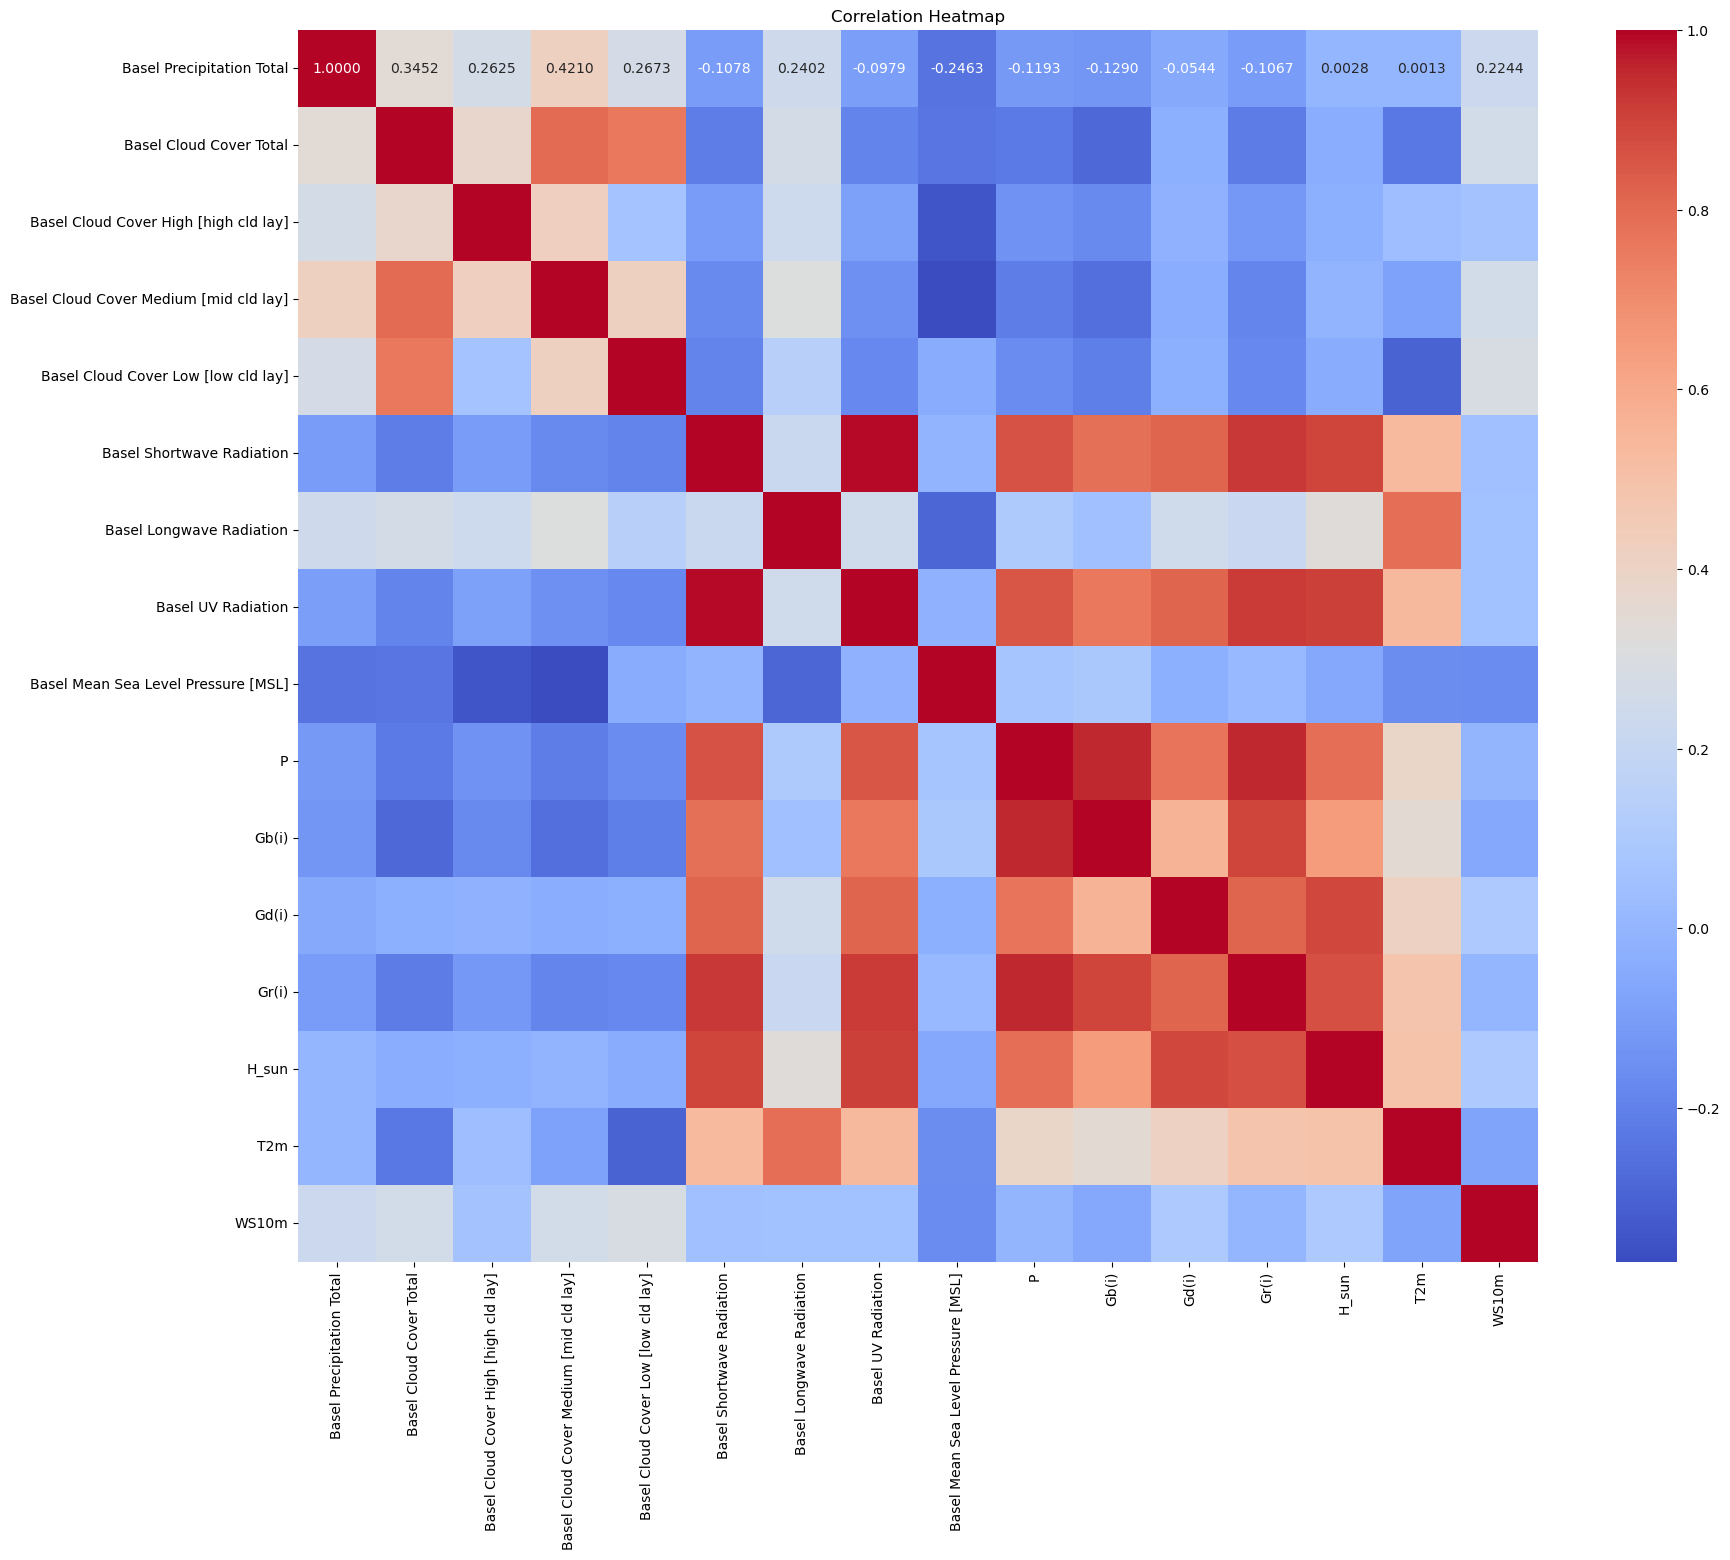

In [17]:
merged_dfd=merged_df.drop(columns=['timestamp'])
# Compute correlation matrix
corr = merged_dfd.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Heatmap')
plt.show()

In [18]:
# Calculate rolling average with a window of 720 (30 days)
merged_df['Monthly_Avg'] = merged_df['P'].rolling(window=720).mean()

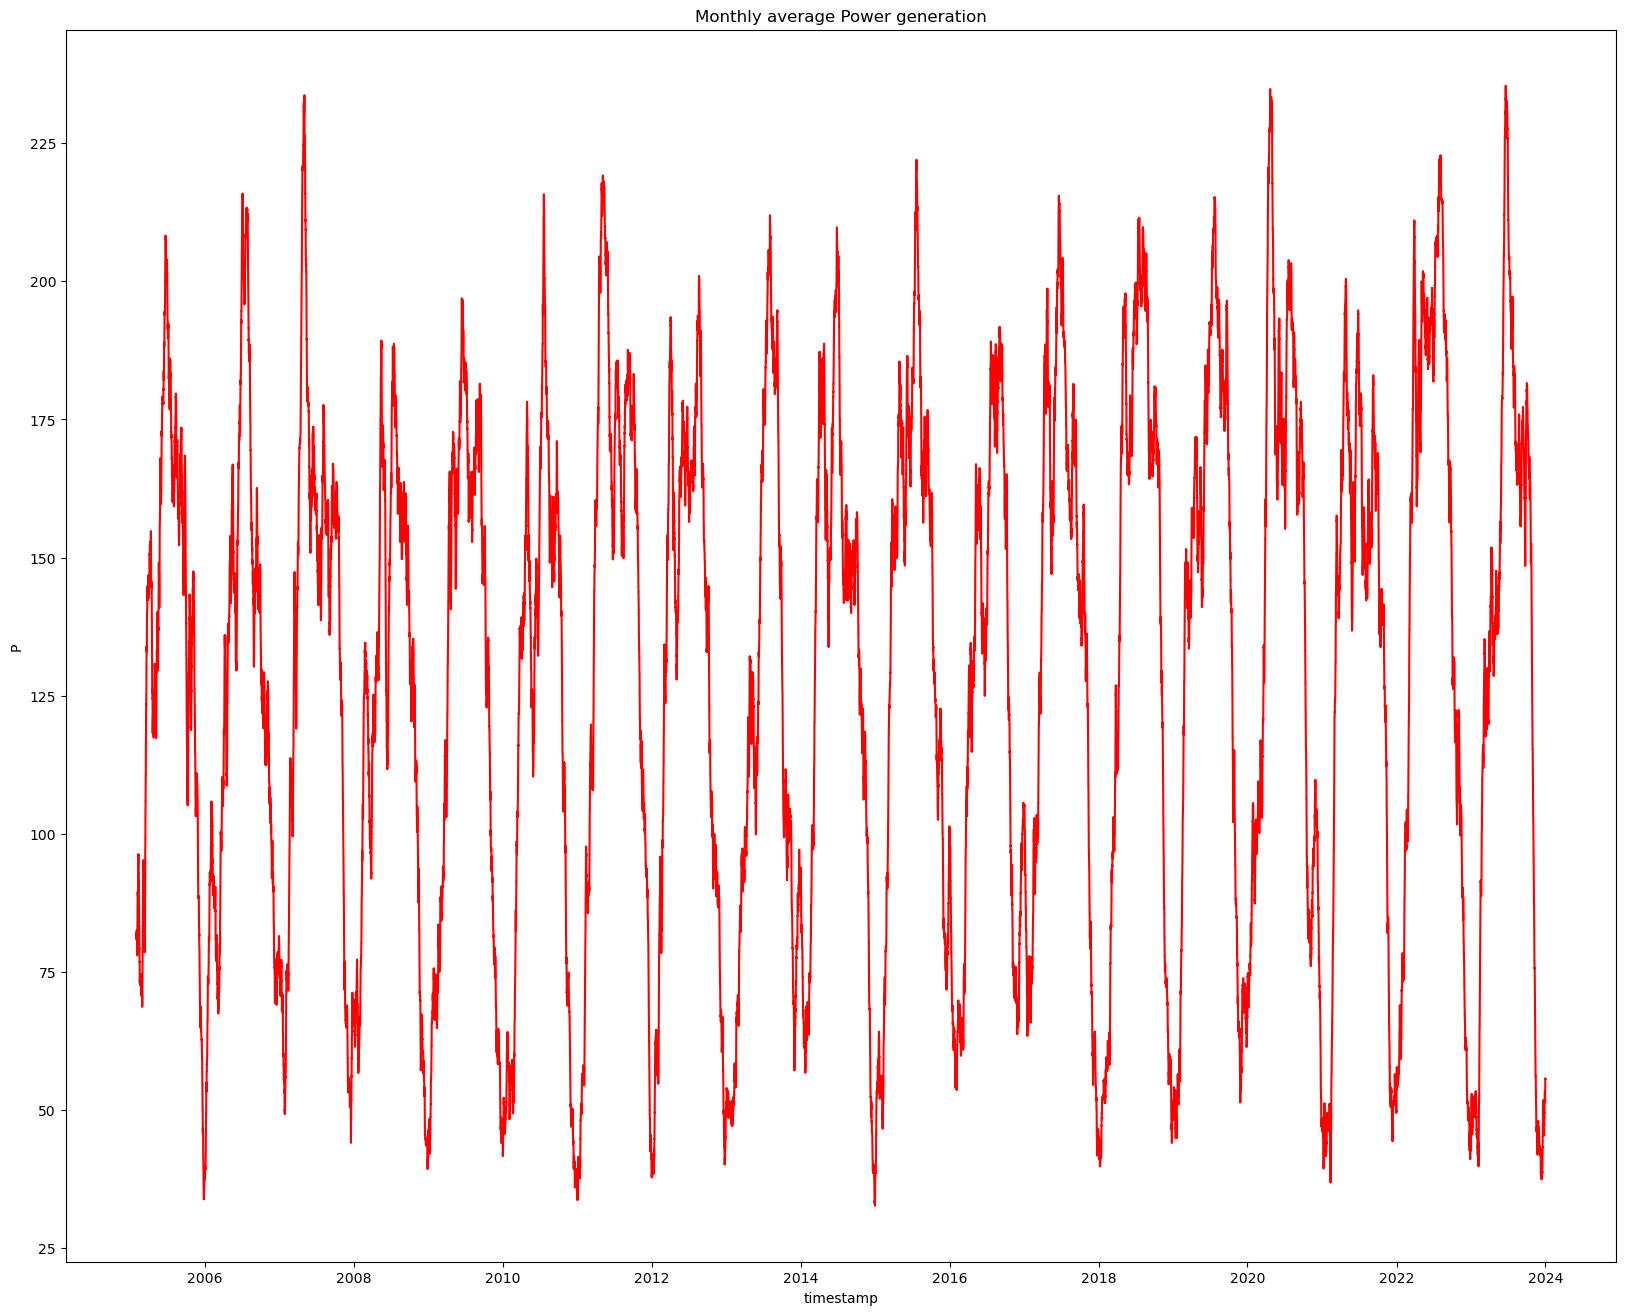

In [19]:
plt.figure(figsize=(20, 16))
plt.plot(merged_df['timestamp'], merged_df['Monthly_Avg'], color='red', label='Monthly Average')
plt.title('Monthly average Power generation')
plt.xlabel('timestamp')
plt.ylabel('P')

plt.show()

In [20]:
# Calculate rolling average with a window of 8,640 (1 year) to see if there is a yearly trend
merged_df['Year_Avg'] = merged_df['P'].rolling(window=8640).mean()

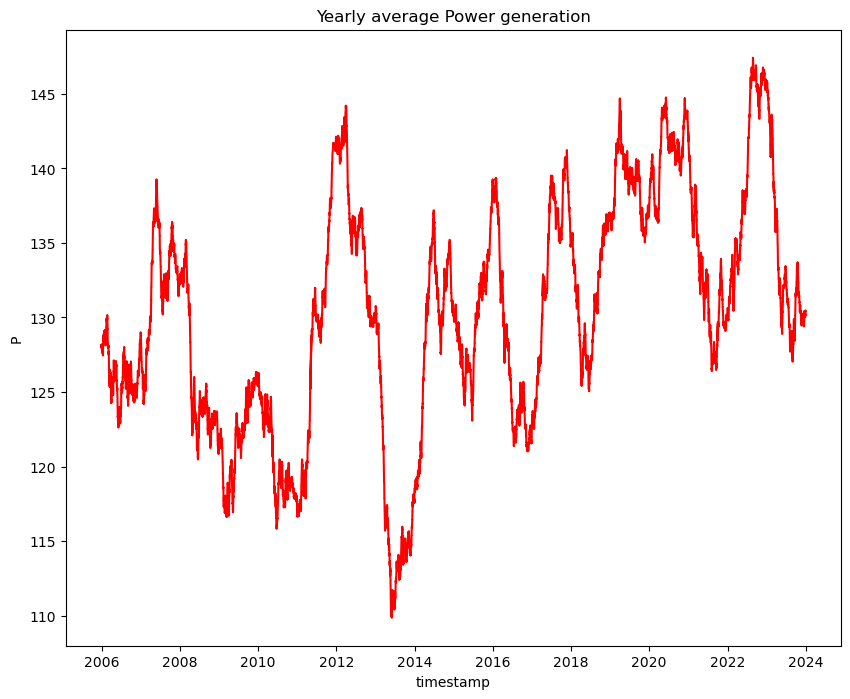

In [21]:
plt.figure(figsize=(10, 8))
plt.plot(merged_df['timestamp'], merged_df['Year_Avg'], color='red', label='Yearly Average')
plt.title('Yearly average Power generation')
plt.xlabel('timestamp')
plt.ylabel('P')

plt.show()

Lets compare the above graph to the solar irradiation over the years, to see if the tendancy to increase is related to irradiance or something else...

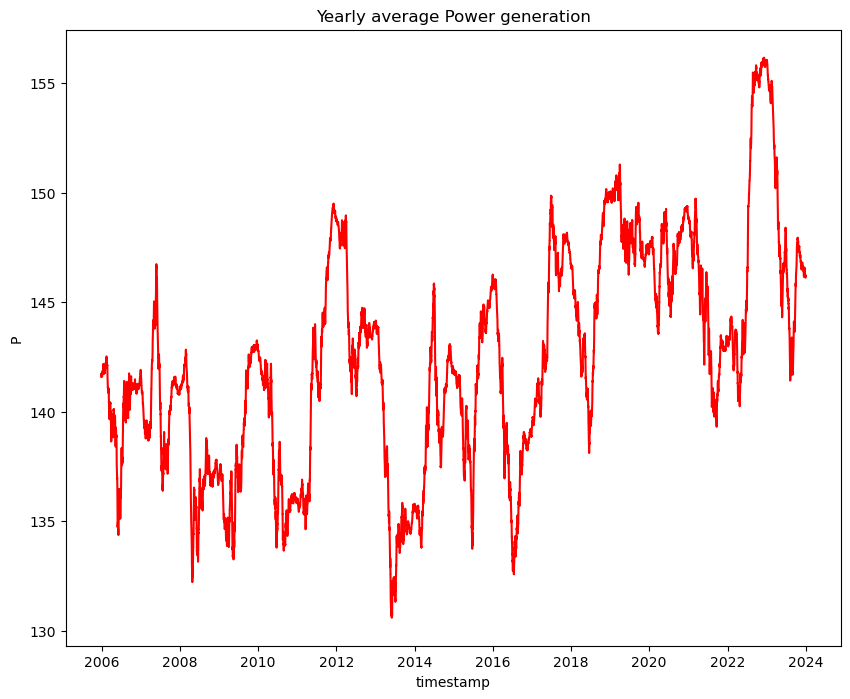

In [22]:
# Calculate rolling average with a window of 8,640 (1 year) to see if there is a yearly trend
merged_df['shortwave_Year_Avg'] = merged_df['Basel Shortwave Radiation'].rolling(window=8640).mean()

plt.figure(figsize=(10, 8))
plt.plot(merged_df['timestamp'], merged_df['shortwave_Year_Avg'], color='red', label='Yearly Average')
plt.title('Yearly average Power generation')
plt.xlabel('timestamp')
plt.ylabel('P')

plt.show()

the graph above is backed by research suggesting increase in shortwave lenght irradiance between 2006 and 2023.

Seasonal Paterns

In [23]:
merged_df['hour']=merged_df['timestamp'].dt.hour
merged_df['day']=merged_df['timestamp'].dt.dayofyear
merged_df['month']=merged_df['timestamp'].dt.month  


In [24]:
hourly_avg = merged_df.groupby('hour')['P'].mean()

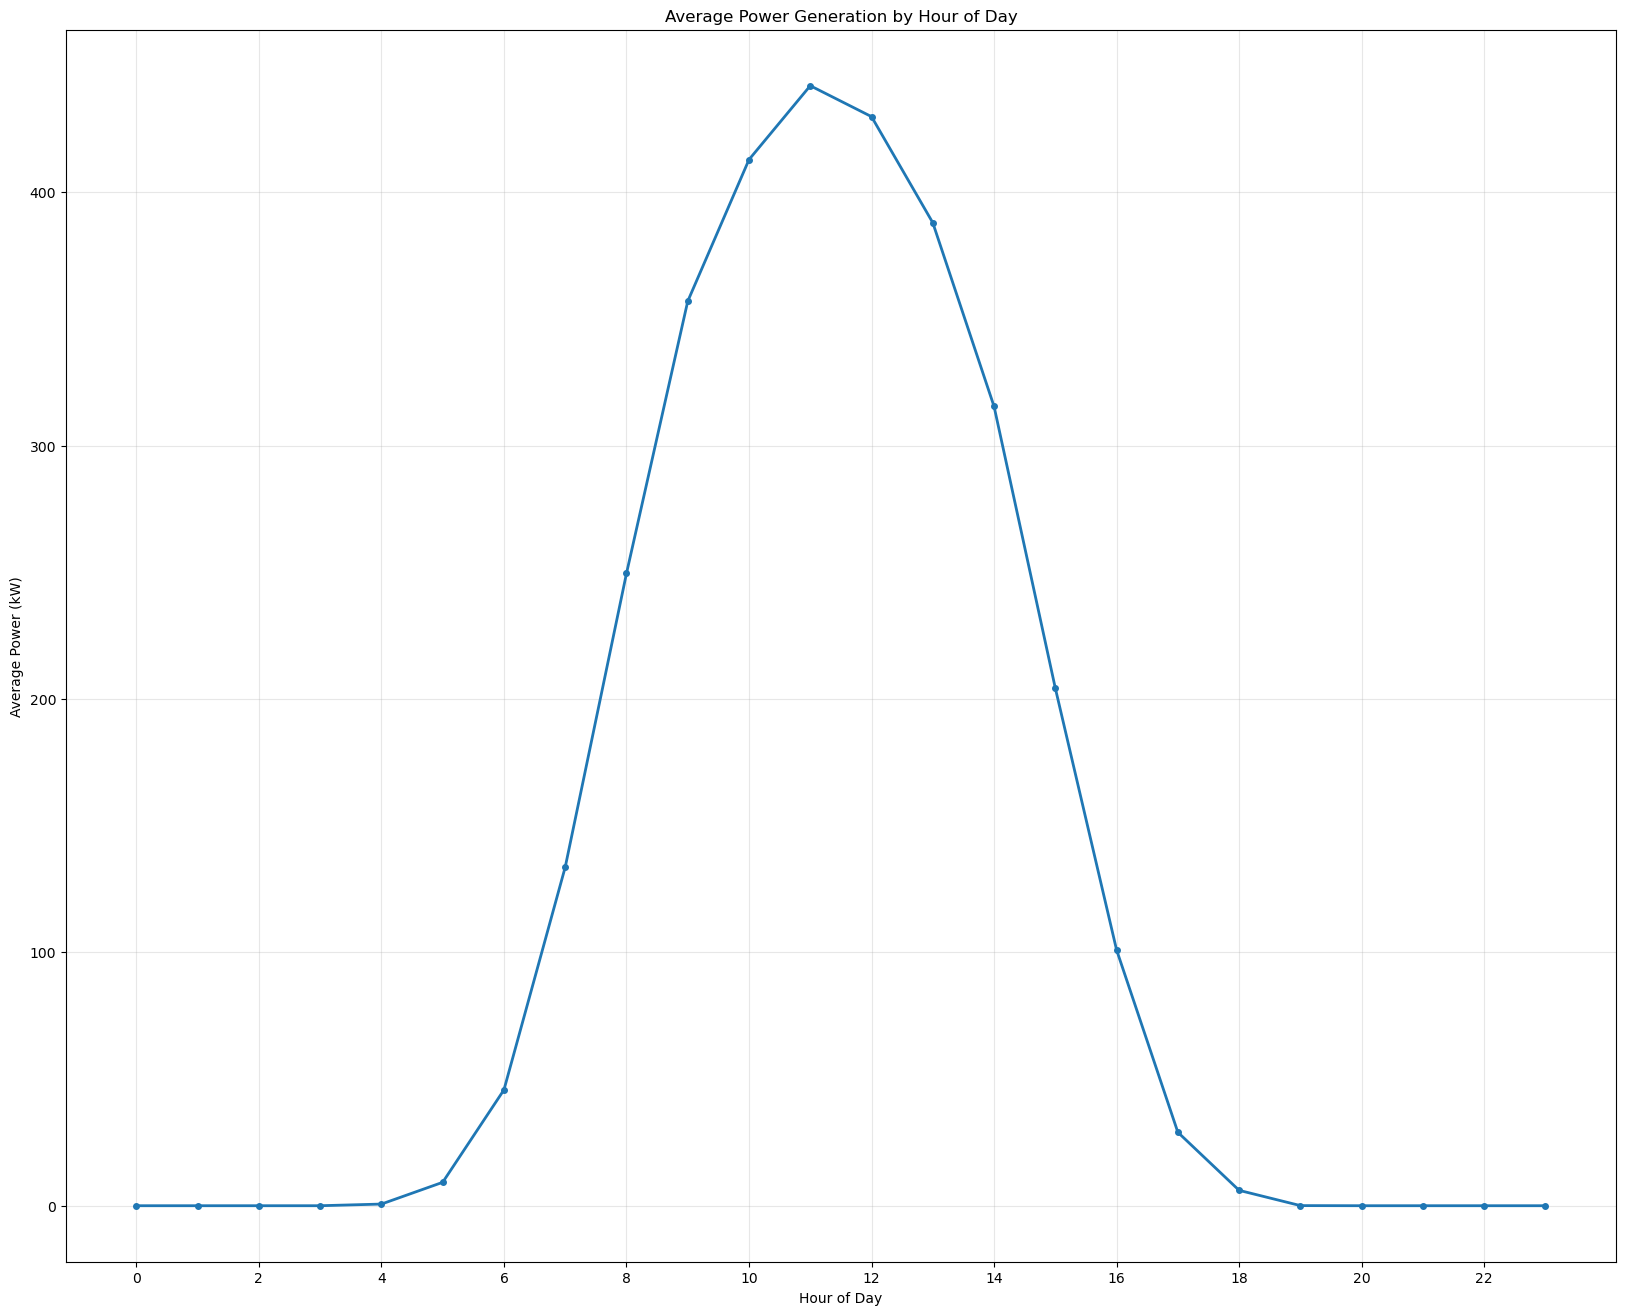

In [25]:
plt.figure(figsize=(20, 16))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2, markersize=4)
plt.title('Average Power Generation by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Power (kW)')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))
plt.show()

In [26]:
monthly_avg = merged_df.groupby('month')['P'].mean()

In [27]:
monthly_avg

month
1      63.955829
2      99.736558
3     140.834412
4     167.892280
5     162.698622
6     179.090545
7     180.760163
8     167.372787
9     154.538798
10    114.762143
11     71.472182
12     57.839566
Name: P, dtype: float64

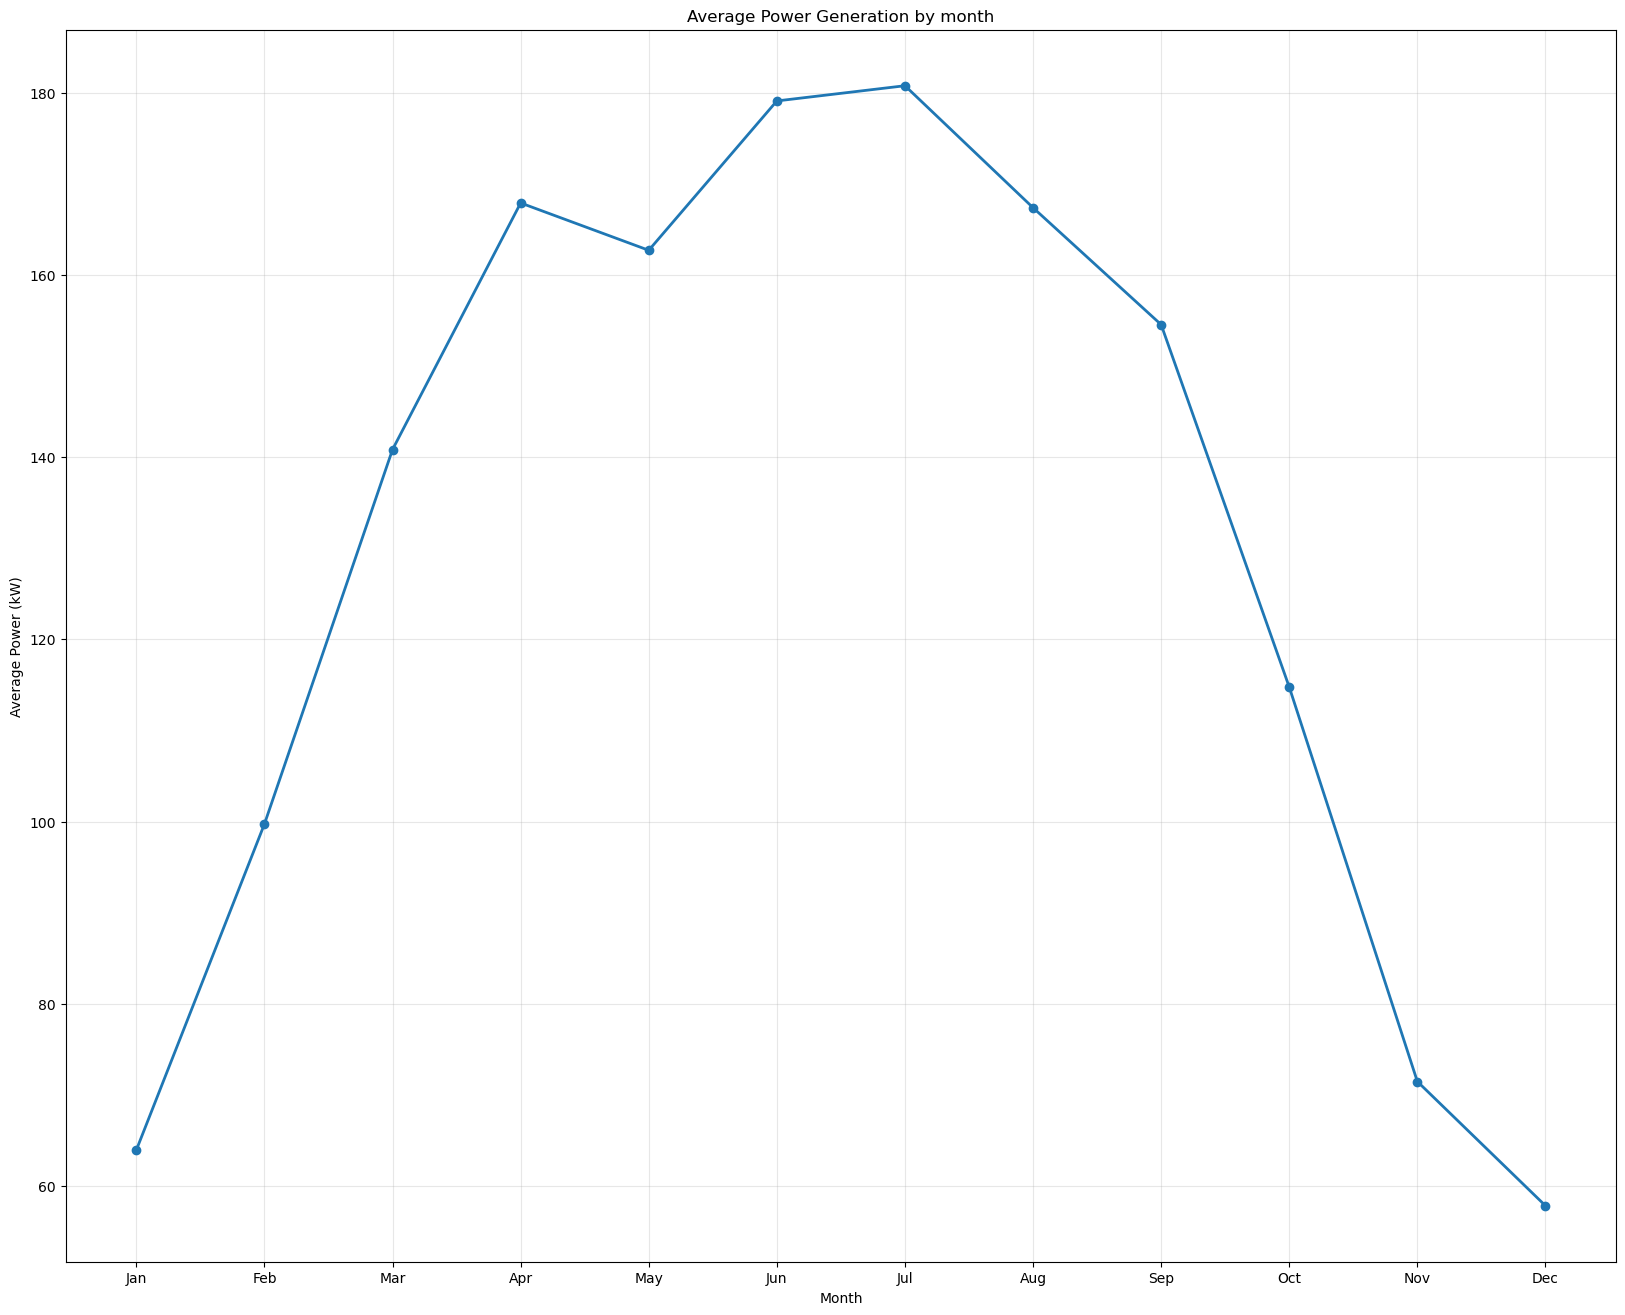

In [28]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(20, 16))
plt.plot(month_names, monthly_avg.values, marker='o', linewidth=2)
plt.title('Average Power Generation by month')
plt.xlabel('Month')
plt.ylabel('Average Power (kW)')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 12, 1))
plt.show()

In [29]:
merged_df.tail()

,timestamp,Basel Precipitation Total,Basel Cloud Cover Total,Basel Cloud Cover High [high cld lay],Basel Cloud Cover Medium [mid cld lay],Basel Cloud Cover Low [low cld lay],Basel Shortwave Radiation,Basel Longwave Radiation,Basel UV Radiation,Basel Mean Sea Level Pressure [MSL],P,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Monthly_Avg,Year_Avg,shortwave_Year_Avg,hour,day,month
166531,2023-12-31 19:00:00,0.0,46.0,44.0,25.0,46.0,0.0,286.0,0.0,1011.5,0.0,0.0,0.0,0.0,0.0,3.19,2.14,55.579639,130.432252,146.2125,19,365,12
166532,2023-12-31 20:00:00,0.0,42.0,43.0,21.0,42.0,0.0,275.0,0.0,1011.8,0.0,0.0,0.0,0.0,0.0,3.25,2.28,55.579639,130.432252,146.2125,20,365,12
166533,2023-12-31 21:00:00,0.0,42.0,15.0,14.0,42.0,0.0,280.0,0.0,1011.8,0.0,0.0,0.0,0.0,0.0,3.64,2.55,55.579639,130.432252,146.2125,21,365,12
166534,2023-12-31 22:00:00,0.0,37.0,63.0,26.0,37.0,0.0,270.0,0.0,1012.4,0.0,0.0,0.0,0.0,0.0,3.44,2.69,55.579639,130.432252,146.2125,22,365,12
166535,2023-12-31 23:00:00,0.0,54.0,74.0,9.0,54.0,0.0,283.0,0.0,1012.6,0.0,0.0,0.0,0.0,0.0,3.79,2.90,55.579639,130.432252,146.2125,23,365,12


In [30]:
#making a temperature column with int values
merged_df["temperature1.0"] = merged_df["T2m"].astype(int)

In [31]:
average_by_temp=merged_df.groupby('temperature1.0')['P'].mean()
average_by_temp.head()

temperature1.0
-18     1.020000
-17    39.743333
-16    61.281304
-15    49.628519
-14    50.773600
Name: P, dtype: float64

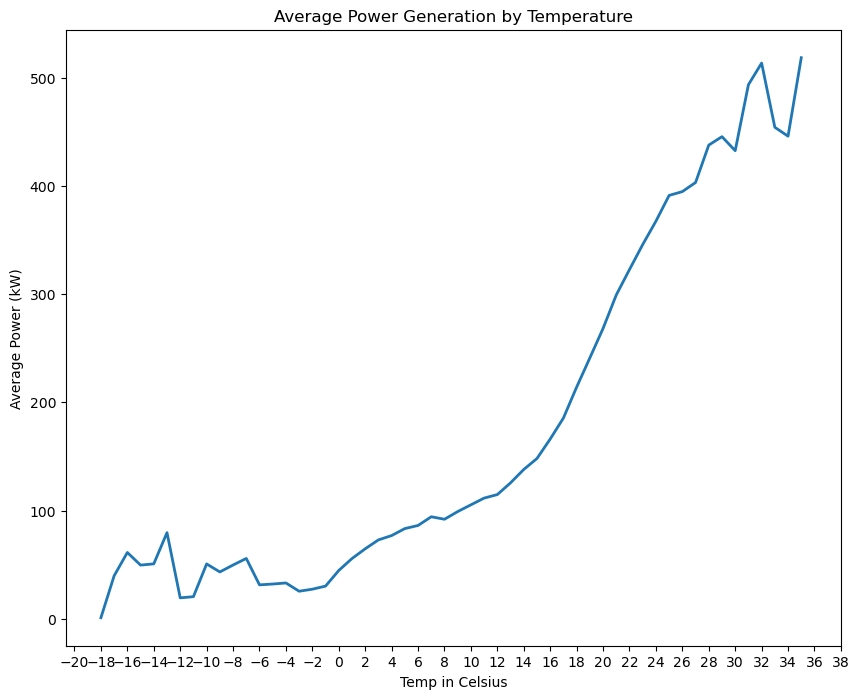

In [32]:
plt.figure(figsize=(10,8))
plt.plot(average_by_temp.index,average_by_temp.values,  marker='', linewidth=2)
plt.title('Average Power Generation by Temperature')
plt.xlabel('Temp in Celsius')
plt.xticks(range(-20, 40, 2))
plt.ylabel('Average Power (kW)')
plt.show()
merged_df['Year_Avg'] = merged_df['P'].rolling(window=8640).mean()

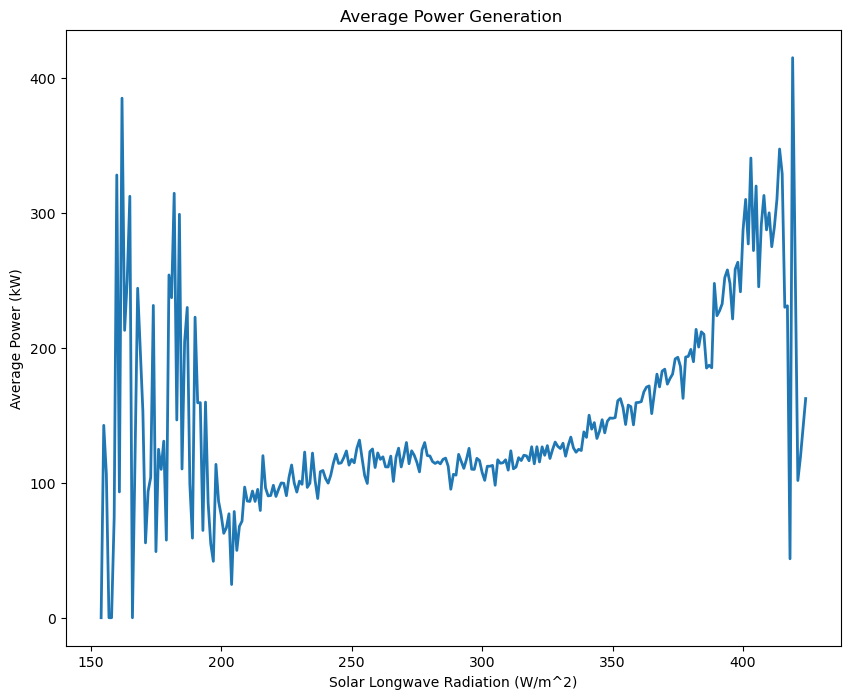

In [33]:
#solar irradiation effect on power generation
Irradition_power=merged_df.groupby('Basel Longwave Radiation')['P'].mean( )

plt.figure(figsize=(10,8))
plt.plot(Irradition_power.index,Irradition_power.values,  marker='', linewidth=2)
plt.title('Average Power Generation ')
plt.xlabel('Solar Longwave Radiation (W/m^2)')

plt.ylabel('Average Power (kW)')
plt.show()


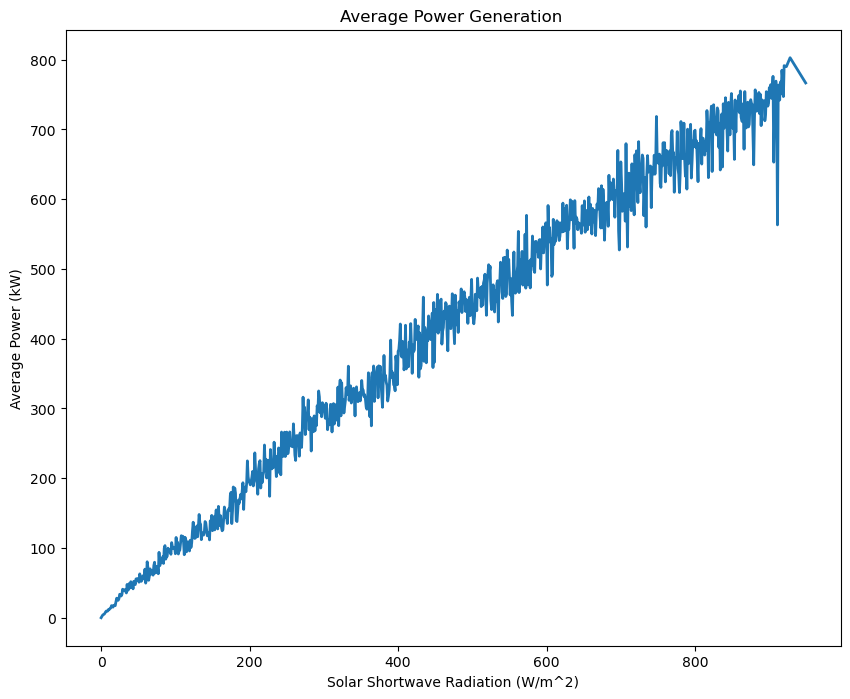

In [34]:
#solar irradiation effect on power generation
Irradition_power=merged_df.groupby('Basel Shortwave Radiation')['P'].mean( )

plt.figure(figsize=(10,8))
plt.plot(Irradition_power.index,Irradition_power.values,  marker='', linewidth=2)
plt.title('Average Power Generation ')
plt.xlabel('Solar Shortwave Radiation (W/m^2)')
plt.ylabel('Average Power (kW)')
plt.show()


In [35]:

merged_df['P'].describe()

count    166536.000000
mean        130.167015
std         219.611768
min           0.000000
25%           0.000000
50%           0.000000
75%         158.822500
max         934.290000
Name: P, dtype: float64

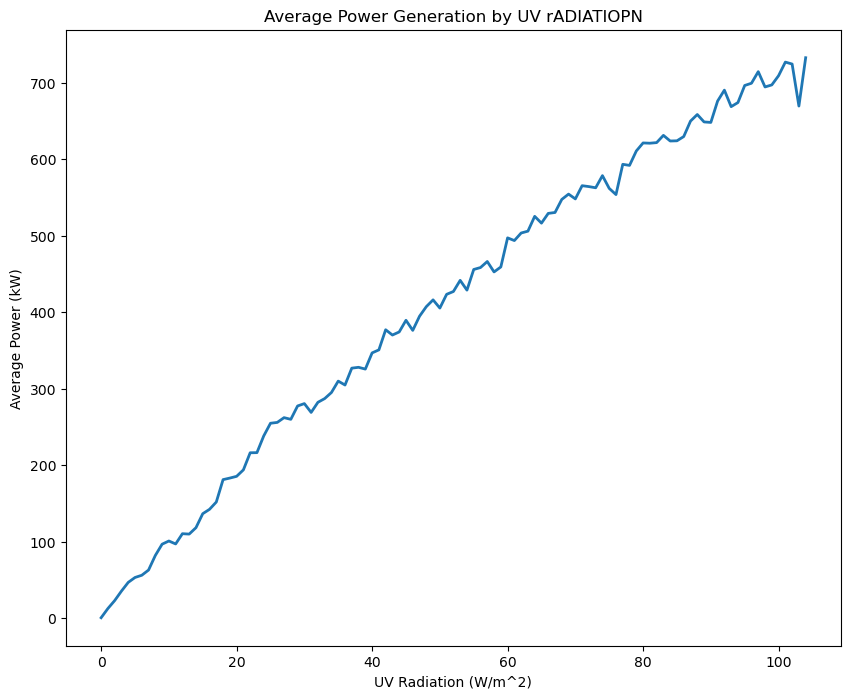

In [36]:
#making a UV Radiation column with int values
merged_df["UV1.0"] = merged_df["Basel UV Radiation"].astype(int)

average_by_UV=merged_df.groupby('UV1.0')['P'].mean()
average_by_UV.tail()

# Plotting the average power generation by UV radiation
plt.figure(figsize=(10,8))
plt.plot(average_by_UV.index,average_by_UV.values,  marker='', linewidth=2)
plt.title('Average Power Generation by UV rADIATIOPN')
plt.xlabel('UV Radiation (W/m^2)')
plt.ylabel('Average Power (kW)')
plt.show()


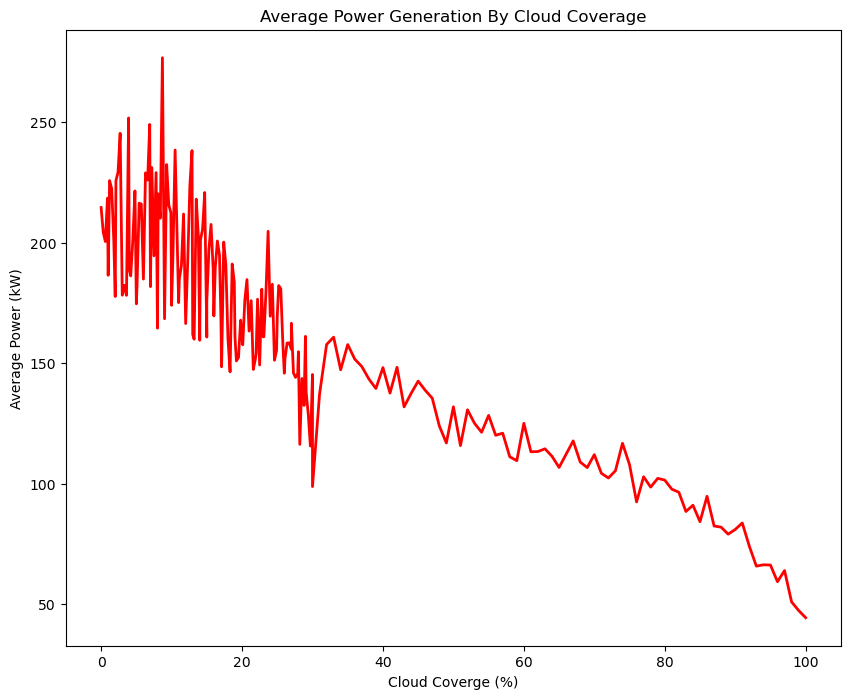

In [37]:
CloudCoverage_power=merged_df.groupby('Basel Cloud Cover Total')['P'].mean( )

plt.figure(figsize=(10,8))
plt.plot(CloudCoverage_power.index,CloudCoverage_power.values, color='r', marker='', linewidth=2)
plt.title('Average Power Generation By Cloud Coverage')
plt.xlabel('Cloud Coverge (%)')

plt.ylabel('Average Power (kW)')
plt.show()


In [38]:
print(merged_df.columns)

Index(['timestamp', 'Basel Precipitation Total', 'Basel Cloud Cover Total',
       'Basel Cloud Cover High [high cld lay]',
       'Basel Cloud Cover Medium [mid cld lay]',
       'Basel Cloud Cover Low [low cld lay]', 'Basel Shortwave Radiation',
       'Basel Longwave Radiation', 'Basel UV Radiation',
       'Basel Mean Sea Level Pressure [MSL]', 'P', 'Gb(i)', 'Gd(i)', 'Gr(i)',
       'H_sun', 'T2m', 'WS10m', 'Monthly_Avg', 'Year_Avg',
       'shortwave_Year_Avg', 'hour', 'day', 'month', 'temperature1.0',
       'UV1.0'],
      dtype='object')


In [39]:
merged_df.drop(columns=['Gb(i)','Gd(i)','Gr(i)','Monthly_Avg','Year_Avg','shortwave_Year_Avg','UV1.0','temperature1.0'], inplace=True)

In [40]:
print(merged_df.columns)

Index(['timestamp', 'Basel Precipitation Total', 'Basel Cloud Cover Total',
       'Basel Cloud Cover High [high cld lay]',
       'Basel Cloud Cover Medium [mid cld lay]',
       'Basel Cloud Cover Low [low cld lay]', 'Basel Shortwave Radiation',
       'Basel Longwave Radiation', 'Basel UV Radiation',
       'Basel Mean Sea Level Pressure [MSL]', 'P', 'H_sun', 'T2m', 'WS10m',
       'hour', 'day', 'month'],
      dtype='object')


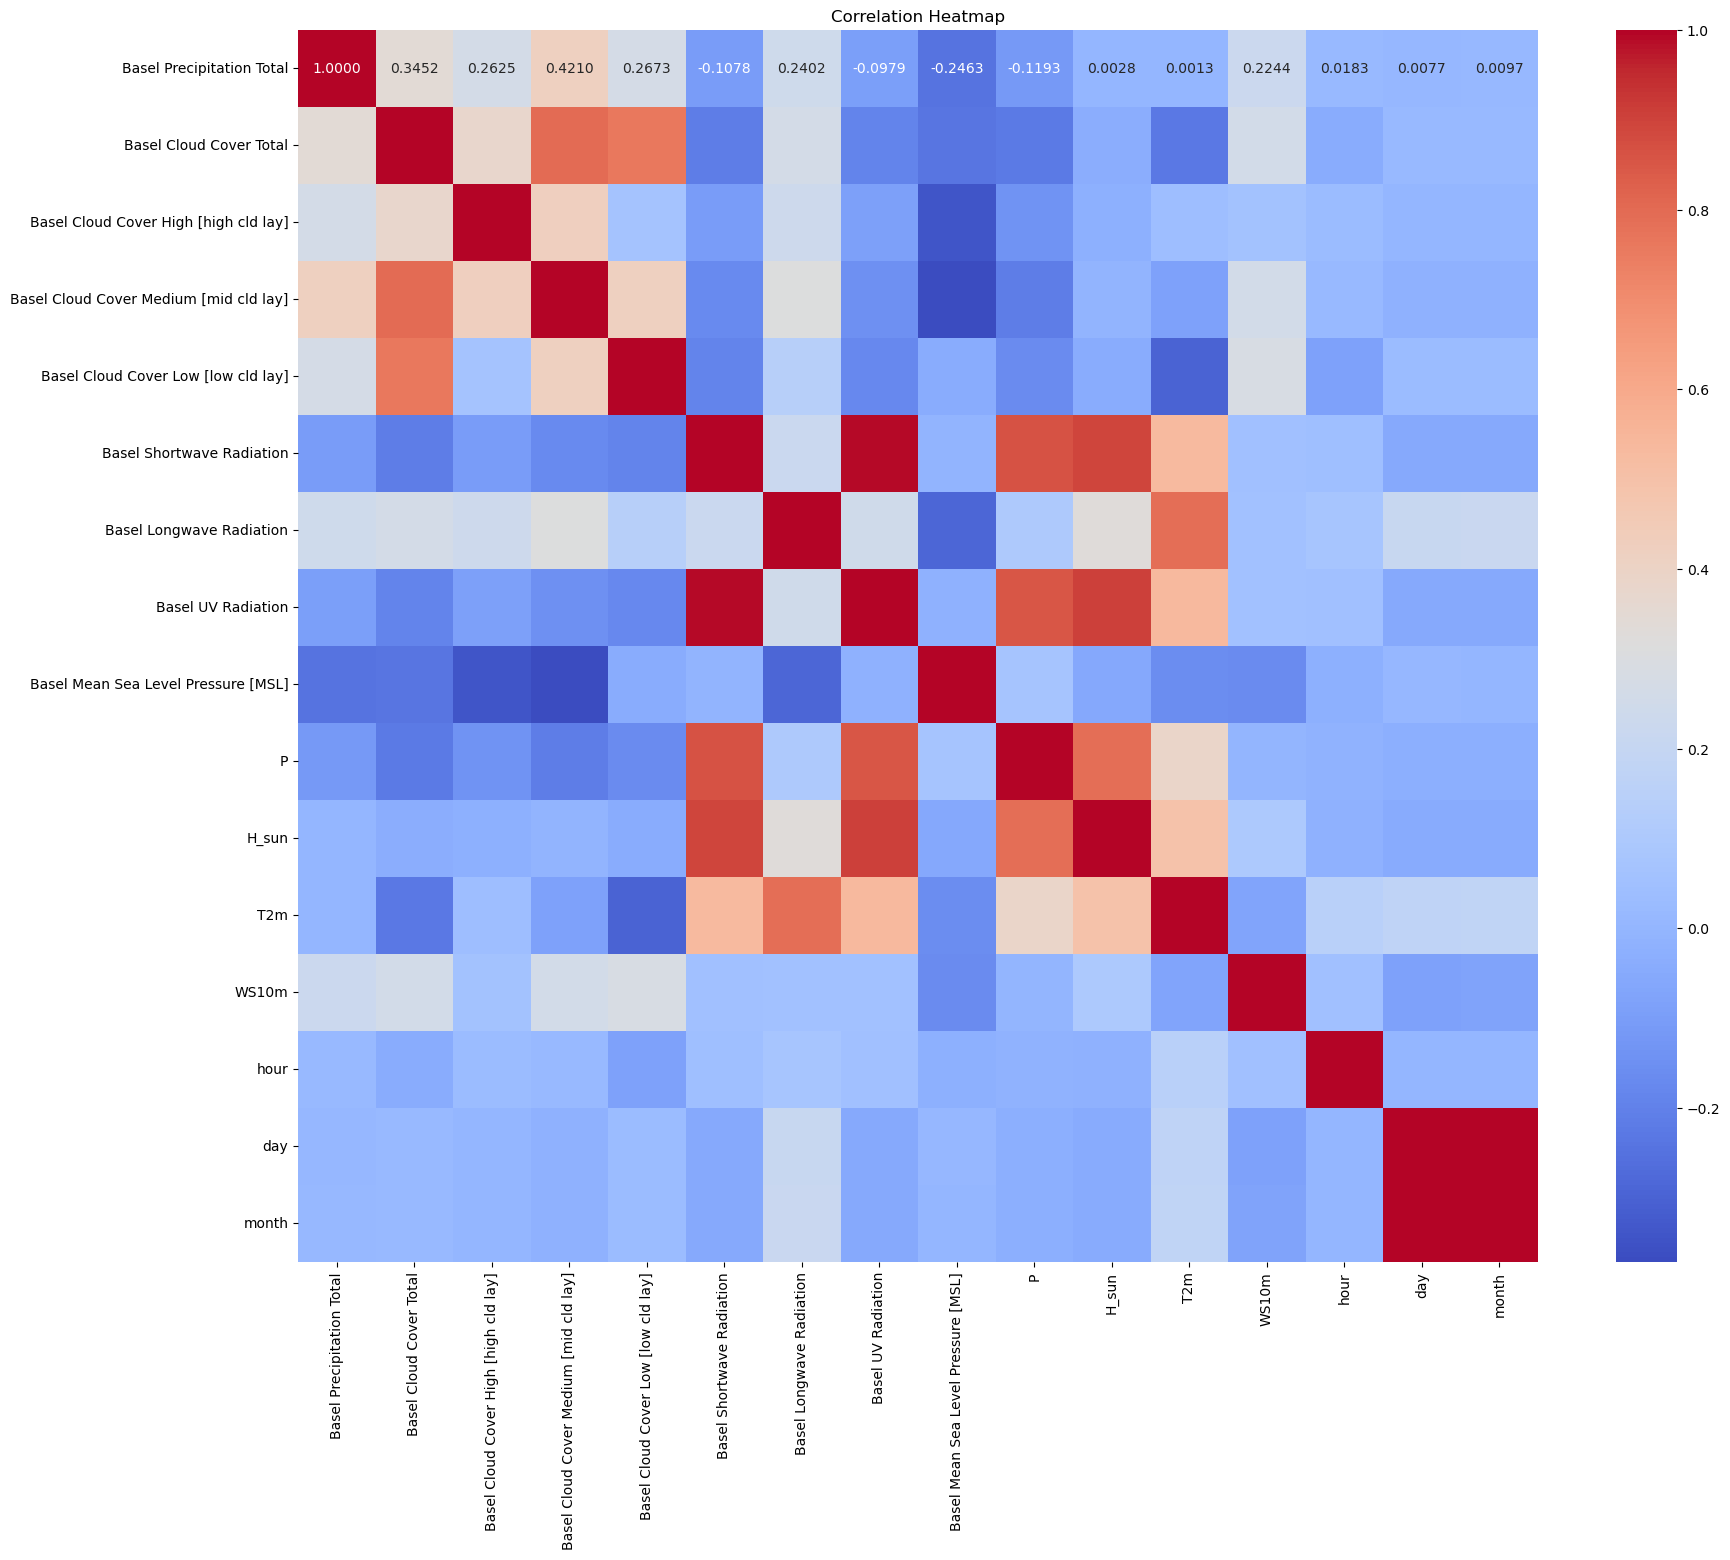

In [41]:
merged_dfd=merged_df.drop(columns=['timestamp'])
# Compute correlation matrix
corr = merged_dfd.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Heatmap')
plt.show()

In [42]:
pip install prophet tensorflow scikit-learn lightgbm

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------- ------------------------- 20.5/60.8 kB 81.9 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 269.2 kB/s eta 0:00:00
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------------------- ------------ 41.0/61.0 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 540.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   -------------------------------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [43]:
print("\n=== PROPHET FORECASTING ===")

 #Prepare data for Prophet (requires 'ds' and 'y' columns)
prophet_data = merged_df[['timestamp', 'P']].copy()
prophet_data.columns = ['ds', 'y']

# Add weather features as regressors
prophet_data['temperature'] = merged_df['T2m']
prophet_data['humidity'] = merged_df['Basel Precipitation Total']
prophet_data['wind_speed'] = merged_df['WS10m']
prophet_data['cloud_cover'] = merged_df['Basel Cloud Cover Total']
prophet_data['solar_irradiance'] = merged_df['Basel Shortwave Radiation']



=== PROPHET FORECASTING ===


In [44]:
# Split data for training and testing
train_size = int(0.8 * len(prophet_data))
prophet_train = prophet_data[:train_size]
prophet_test = prophet_data[train_size:]

In [45]:
from prophet import Prophet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb



In [46]:
# Initialize Prophet model
prophet_model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='additive',
    interval_width=0.95
)

In [47]:
# Add weather regressors
prophet_model.add_regressor('temperature')
prophet_model.add_regressor('humidity')
prophet_model.add_regressor('wind_speed')
prophet_model.add_regressor('cloud_cover')
prophet_model.add_regressor('solar_irradiance')

In [48]:

print(np.std(prophet_test['y']))

226.92349004788102


In [49]:
prophet_model = Prophet()
# Train Prophet model
print("Training Prophet model...")
prophet_model.fit(prophet_train)


# Make predictions
prophet_forecast = prophet_model.predict(prophet_test)

# Calculate Prophet metrics
prophet_mae = mean_absolute_error(prophet_test['y'], prophet_forecast['yhat'])
prophet_rmse = np.sqrt(mean_squared_error(prophet_test['y'], prophet_forecast['yhat']))
prophet_r2 = r2_score(prophet_test['y'], prophet_forecast['yhat'])

print(f"Prophet MAE: {prophet_mae:.4f}")
print(f"Prophet RMSE: {prophet_rmse:.4f}")
print(f"Prophet R²: {prophet_r2:.4f}")

Training Prophet model...


21:11:07 - cmdstanpy - INFO - Chain [1] start processing
21:12:29 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAE: 99.2535
Prophet RMSE: 137.7194
Prophet R²: 0.6317


In [50]:
merged_df = merged_df.rename(columns={
    'Basel Cloud Cover High [high cld lay]': 'Basel Cloud Cover High high cld lay',
    'Basel Cloud Cover Medium [mid cld lay]': 'Basel Cloud Cover Medium mid cld lay',
    'Basel Cloud Cover Low [low cld lay]': 'Basel Cloud Cover Low low cld lay',
    'Basel Mean Sea Level Pressure [MSL]': 'Basel Mean Sea Level Pressure MSL'
})

In [91]:
print("\n=== LIGHTGBM FORECASTING ===")

       
# Prepare features for LightGBM
lgb_features = ['hour', 'day', 'month',  
                'WS10m', 'Basel Cloud Cover Total',
                'Basel Cloud Cover High high cld lay',
                'Basel Cloud Cover Medium mid cld lay',
                'Basel Cloud Cover Low low cld lay',  'Basel Shortwave Radiation',
                'Basel Longwave Radiation', 'Basel UV Radiation','Basel Mean Sea Level Pressure MSL','Basel Precipitation Total']

# Create lagged features for time series
for lag in [1, 2, 3, 24, 48, 168]:  # 1-3 hours, 1-2 days, 1 week
    merged_df[f'energy_lag_{lag}'] = merged_df['P'].shift(lag)
    lgb_features.append(f'energy_lag_{lag}')

# Rolling statistics
for window in [24, 168]:  # 1 day, 1 week
    merged_df[f'energy_roll_mean_{window}'] = merged_df['P'].rolling(window=window, min_periods=1).mean()
    merged_df[f'energy_roll_std_{window}'] = merged_df['P'].rolling(window=window, min_periods=1).std()
    lgb_features.extend([f'energy_roll_mean_{window}', f'energy_roll_std_{window}'])

# Drop rows with NaN values
df_clean = merged_df.dropna()

# Split data
train_size = int(0.8 * len(df_clean))
X_train_lgb = df_clean[lgb_features][:train_size]
y_train_lgb = df_clean['P'][:train_size]
X_test_lgb = df_clean[lgb_features][train_size:]
y_test_lgb = df_clean['P'][train_size:]

# Train LightGBM model
print("Training LightGBM model...")
lgb_train = lgb.Dataset(X_train_lgb, label=y_train_lgb)
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

lgb_model = lgb.train(
    lgb_params,
    lgb_train,
    num_boost_round=1000,
    valid_sets=[lgb_train],
    callbacks=[lgb.early_stopping(100), lgb.log_evaluation(0)]
)

# Make predictions
lgb_predictions = lgb_model.predict(X_test_lgb)

# Calculate LightGBM metrics
lgb_mae = mean_absolute_error(y_test_lgb, lgb_predictions)
lgb_rmse = np.sqrt(mean_squared_error(y_test_lgb, lgb_predictions))
lgb_r2 = r2_score(y_test_lgb, lgb_predictions)

print(f"LightGBM MAE: {lgb_mae:.4f}")
print(f"LightGBM RMSE: {lgb_rmse:.4f}")
print(f"LightGBM R²: {lgb_r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': lgb_model.feature_name(),
    'importance': lgb_model.feature_importance()
}).sort_values('importance', ascending=False)
print(f"\nTop 5 most important features:")
print(feature_importance.head())


=== LIGHTGBM FORECASTING ===
Training LightGBM model...


c:\Users\MSI\anaconda3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")


LightGBM MAE: 25.8745
LightGBM RMSE: 60.2417
LightGBM R²: 0.9295

Top 5 most important features:
                feature  importance
13         energy_lag_1        3989
20   energy_roll_std_24        3673
16        energy_lag_24        2268
0                  hour        2201
19  energy_roll_mean_24        1917


In [96]:
import pickle

with open('solar_energy_model.pkl', 'wb') as f:
    pickle.dump(lgb_model, f)

In [94]:
# 2. Save feature names for the Streamlit app
import joblib
joblib.dump(lgb_features, 'feature_names.pkl')
print("✅ Feature names saved as 'feature_names.pkl'")

✅ Feature names saved as 'feature_names.pkl'


In [97]:
merged_df

,timestamp,Basel Precipitation Total,Basel Cloud Cover Total,Basel Cloud Cover High high cld lay,Basel Cloud Cover Medium mid cld lay,Basel Cloud Cover Low low cld lay,Basel Shortwave Radiation,Basel Longwave Radiation,Basel UV Radiation,Basel Mean Sea Level Pressure MSL,P,H_sun,T2m,WS10m,hour,day,month,energy_lag_1,energy_lag_2,energy_lag_3,energy_lag_24,energy_lag_48,energy_lag_168,energy_roll_mean_24,energy_roll_std_24,energy_roll_mean_168,energy_roll_std_168,weekday
0,2005-01-01 00:00:00,0.2,96.0,2.0,55.0,96.0,0.0,328.0,0.0,1030.1,0.0,0.0,2.44,1.86,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.00000,NaN,5
1,2005-01-01 01:00:00,0.2,100.0,0.0,45.0,100.0,0.0,329.0,0.0,1029.4,0.0,0.0,2.56,1.86,1,1,1,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.00000,0.000000,5
2,2005-01-01 02:00:00,0.0,100.0,0.0,30.0,100.0,0.0,328.0,0.0,1029.7,0.0,0.0,2.58,1.79,2,1,1,0.0,0.0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.00000,0.000000,5
3,2005-01-01 03:00:00,0.0,100.0,0.0,28.0,100.0,0.0,326.0,0.0,1029.5,0.0,0.0,2.53,1.72,3,1,1,0.0,0.0,0.0,NaN,NaN,NaN,0.000000,0.000000,0.00000,0.000000,5
4,2005-01-01 04:00:00,0.1,100.0,0.0,23.0,100.0,0.0,325.0,0.0,1029.5,0.0,0.0,2.48,1.66,4,1,1,0.0,0.0,0.0,NaN,NaN,NaN,0.000000,0.000000,0.00000,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166531,2023-12-31 19:00:00,0.0,46.0,44.0,25.0,46.0,0.0,286.0,0.0,1011.5,0.0,0.0,3.19,2.14,19,31,12,0.0,0.0,0.0,0.0,0.0,0.0,6.858333,12.378113,78.25744,173.973453,6
166532,2023-12-31 20:00:00,0.0,42.0,43.0,21.0,42.0,0.0,275.0,0.0,1011.8,0.0,0.0,3.25,2.28,20,31,12,0.0,0.0,0.0,0.0,0.0,0.0,6.858333,12.378113,78.25744,173.973453,6
166533,2023-12-31 21:00:00,0.0,42.0,15.0,14.0,42.0,0.0,280.0,0.0,1011.8,0.0,0.0,3.64,2.55,21,31,12,0.0,0.0,0.0,0.0,0.0,0.0,6.858333,12.378113,78.25744,173.973453,6
166534,2023-12-31 22:00:00,0.0,37.0,63.0,26.0,37.0,0.0,270.0,0.0,1012.4,0.0,0.0,3.44,2.69,22,31,12,0.0,0.0,0.0,0.0,0.0,0.0,6.858333,12.378113,78.25744,173.973453,6


In [52]:
TARGET_COL = 'P'  

feature_cols = [
    'Basel Precipitation Total',
    'Basel Cloud Cover Total',
    'Basel Cloud Cover High high cld lay',
    'Basel Cloud Cover Medium mid cld lay',
    'Basel Cloud Cover Low low cld lay',
    'Basel Shortwave Radiation',
    'Basel Longwave Radiation',
    'Basel UV Radiation',
    'Basel Mean Sea Level Pressure MSL',
    'H_sun',
    'T2m',
    'WS10m',
    
]

In [ ]:
with open('solar_energy_model.pkl', 'rb') as f:
    mp=pickle.load(f)

    

In [53]:
X = merged_df[feature_cols].copy()
y = merged_df[TARGET_COL].copy()

In [54]:
merged_df = merged_df.sort_values('timestamp')
split_idx = int(len(merged_df) * 0.8)
train_df = merged_df.iloc[:split_idx]
test_df  = merged_df.iloc[split_idx:]

X_train = train_df[feature_cols]
y_train = train_df[TARGET_COL]
X_test  = test_df[feature_cols]
y_test  = test_df[TARGET_COL]

In [55]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"MAE:  {mae:.3f}")
print(f"R²:   {r2:.3f}")

RMSE: 103.482
MAE:  65.091
R²:   0.792


#result comparaison

In [57]:
print("\n=== MODEL COMPARISON ===")
print(f"{'Model':<10} {'MAE':<10} {'RMSE':<10} {'R²':<10}")
print("-" * 40)
print(f"{'Prophet':<10} {prophet_mae:<10.4f} {prophet_rmse:<10.4f} {prophet_r2:<10.4f}")
print(f"{'LightGBM':<10} {lgb_mae:<10.4f} {lgb_rmse:<10.4f} {lgb_r2:<10.4f}")



=== MODEL COMPARISON ===
Model      MAE        RMSE       R²        
----------------------------------------
Prophet    99.2535    137.7194   0.6317    
LightGBM   25.8758    60.2151    0.9295    


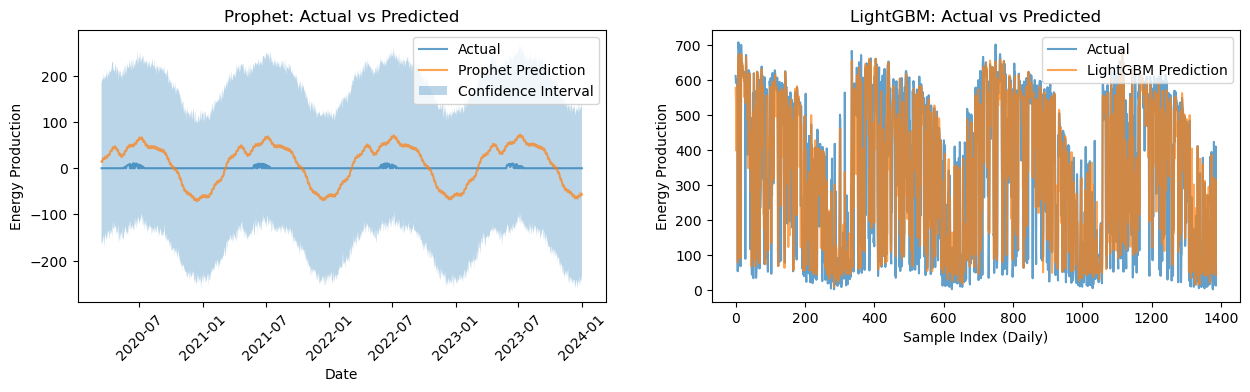

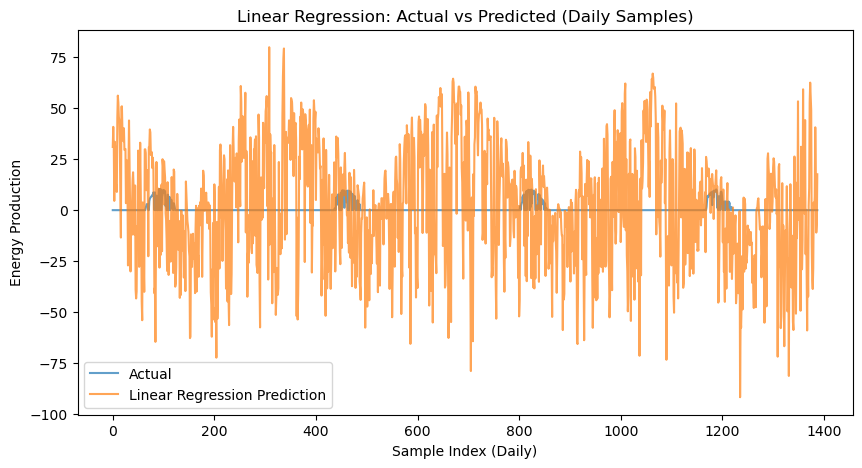

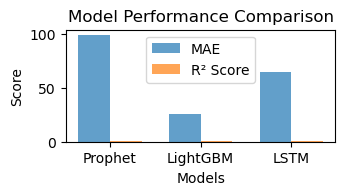


=== KEY INSIGHTS ===
1. Prophet: Best for understanding seasonality and trends with interpretable components
2. LightGBM: Often best for tabular data with engineered features, fast training
3. LSTM: Good for capturing complex temporal patterns, requires more data and tuning

For solar energy forecasting:
- Use Prophet for business planning and trend analysis
- Use LightGBM for operational forecasting with weather features
- Use LSTM for capturing complex weather-production relationships


In [58]:

plt.figure(figsize=(15, 12))

# Plot 3: Prophet predictions vs actual
plt.subplot(3, 2, 3)
test_sample = prophet_test.iloc[::24]  # Sample daily
forecast_sample = prophet_forecast.iloc[::24]
plt.plot(test_sample['ds'], test_sample['y'], label='Actual', alpha=0.7)
plt.plot(test_sample['ds'], forecast_sample['yhat'], label='Prophet Prediction', alpha=0.7)
plt.fill_between(test_sample['ds'], forecast_sample['yhat_lower'], forecast_sample['yhat_upper'], 
                alpha=0.3, label='Confidence Interval')
plt.title('Prophet: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Energy Production')
plt.legend()
plt.xticks(rotation=45)

# Plot 4: LightGBM predictions vs actual
plt.subplot(3, 2, 4)
test_sample_indices = range(0, len(y_test_lgb), 24)  # Sample daily
plt.plot([y_test_lgb.iloc[i] for i in test_sample_indices], label='Actual', alpha=0.7)
plt.plot([lgb_predictions[i] for i in test_sample_indices], label='LightGBM Prediction', alpha=0.7)
plt.title('LightGBM: Actual vs Predicted')
plt.xlabel('Sample Index (Daily)')
plt.ylabel('Energy Production')
plt.legend()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Sample every 24 steps assuming hourly data (adjust if your data frequency differs)
test_sample_indices = range(0, len(y_test), 24)

# Plot actual energy production (test set)
plt.plot([y_test.values[i] for i in test_sample_indices], label='Actual', alpha=0.7)

# Plot predicted energy production by linear regression
plt.plot([y_pred[i] for i in test_sample_indices], label='Linear Regression Prediction', alpha=0.7)

plt.title('Linear Regression: Actual vs Predicted (Daily Samples)')
plt.xlabel('Sample Index (Daily)')
plt.ylabel('Energy Production')
plt.legend()
plt.show()

# Plot 6: Model comparison
plt.subplot(3, 2, 6)
models = ['Prophet', 'LightGBM', 'LSTM']
mae_scores = [prophet_mae, lgb_mae, mae]
r2_scores = [prophet_r2, lgb_r2, r2]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, mae_scores, width, label='MAE', alpha=0.7)
plt.bar(x + width/2, r2_scores, width, label='R² Score', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.legend()

plt.tight_layout()
plt.show()

print("\n=== KEY INSIGHTS ===")
print("1. Prophet: Best for understanding seasonality and trends with interpretable components")
print("2. LightGBM: Often best for tabular data with engineered features, fast training")
print("3. LSTM: Good for capturing complex temporal patterns, requires more data and tuning")
print("\nFor solar energy forecasting:")
print("- Use Prophet for business planning and trend analysis")
print("- Use LightGBM for operational forecasting with weather features")
print("- Use LSTM for capturing complex weather-production relationships")

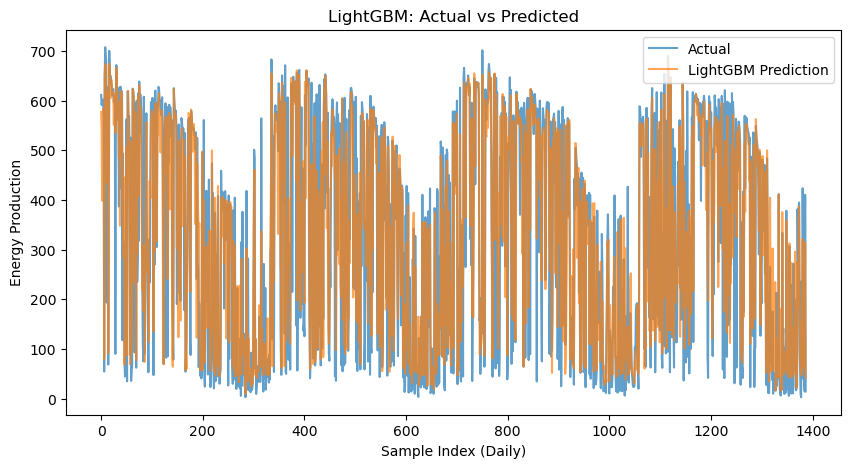

In [59]:
# Plot 4: LightGBM predictions vs actual
plt.figure(figsize=(10, 5))
test_sample_indices = range(0, len(y_test_lgb), 24)  # Sample daily
plt.plot([y_test_lgb.iloc[i] for i in test_sample_indices], label='Actual', alpha=0.7)
plt.plot([lgb_predictions[i] for i in test_sample_indices], label='LightGBM Prediction', alpha=0.7)
plt.title('LightGBM: Actual vs Predicted')
plt.xlabel('Sample Index (Daily)')
plt.ylabel('Energy Production')
plt.legend()
plt.show()

In [60]:
"""# Export to CSV
merged_df.to_csv("Merged Data.csv", index=False)"""

'# Export to CSV\nmerged_df.to_csv("Merged Data.csv", index=False)'

In [61]:
print(merged_df.columns)

Index(['timestamp', 'Basel Precipitation Total', 'Basel Cloud Cover Total',
       'Basel Cloud Cover High high cld lay',
       'Basel Cloud Cover Medium mid cld lay',
       'Basel Cloud Cover Low low cld lay', 'Basel Shortwave Radiation',
       'Basel Longwave Radiation', 'Basel UV Radiation',
       'Basel Mean Sea Level Pressure MSL', 'P', 'H_sun', 'T2m', 'WS10m',
       'hour', 'day', 'month', 'energy_lag_1', 'energy_lag_2', 'energy_lag_3',
       'energy_lag_24', 'energy_lag_48', 'energy_lag_168',
       'energy_roll_mean_24', 'energy_roll_std_24', 'energy_roll_mean_168',
       'energy_roll_std_168'],
      dtype='object')


In [67]:
# Export to CSV
""""merged_df.to_csv("Merged Data.csv", index=False)"""

'"merged_df.to_csv("Merged Data.csv", index=False)'

LSTM Model


In [68]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

adding hour, day, month features for lstm model to learn from

In [78]:
merged_df['hour'] = merged_df['timestamp'].dt.hour
merged_df['day'] = merged_df['timestamp'].dt.day
merged_df['month'] = merged_df['timestamp'].dt.month
merged_df['weekday'] = merged_df['timestamp'].dt.weekday


In [83]:
X = merged_df[['hour', 'day', 'month', 'weekday']].values
y = merged_df['P'].values.reshape(-1, 1)

# Normalize
x_scaler = MinMaxScaler()
X_scaled = x_scaler.fit_transform(X)

y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y)

In [84]:
def create_sequences(X, y, seq_length):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i+seq_length])
        ys.append(y[i+seq_length])
    return np.array(Xs), np.array(ys)

SEQ_LEN = 24  # past 24 hours
X_seq, y_seq = create_sequences(X_scaled, y_scaled, SEQ_LEN)


In [72]:
from sklearn.model_selection import train_test_split

In [86]:
"""X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)"""   #this is not recommended cause lstm expects sequential data but train test split randomises the picking of data

'X_train, X_test, y_train, y_test = train_test_split(\n    X, y, test_size=0.2, random_state=42)'

In [87]:
split = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

In [88]:
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

c:\Users\MSI\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4163/4163 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 0.0246 - val_loss: 0.0201
Epoch 2/20
4163/4163 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 0.0201 - val_loss: 0.0209
Epoch 3/20
4163/4163 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - loss: 0.0198 - val_loss: 0.0196
Epoch 4/20
4163/4163 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 0.0197 - val_loss: 0.0184
Epoch 5/20
4163/4163 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - loss: 0.0197 - val_loss: 0.0186
Epoch 6/20
4163/4163 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - loss: 0.0196 - val_loss: 0.0187
Epoch 7/20
4163/4163 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.0195 - val_loss: 0.0184
Epoch 8/20
4163/4163 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - loss: 0.0194 - val_loss: 0.0186
Epoch 9/20
4163/4163 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - loss: 0.0196 - val_loss: 0.0190
Epoch 10/20
4163/4163 ━━━━━━━━━━━━━━━━━━━━ 45s 11ms/step - loss: 0.0192 - val_loss: 0.0186
Epoch 11/20
4163/4163 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0191 - val_loss: 0.0186
Epoch 12/20
4163

Predict and Inverse Scale

1041/1041 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


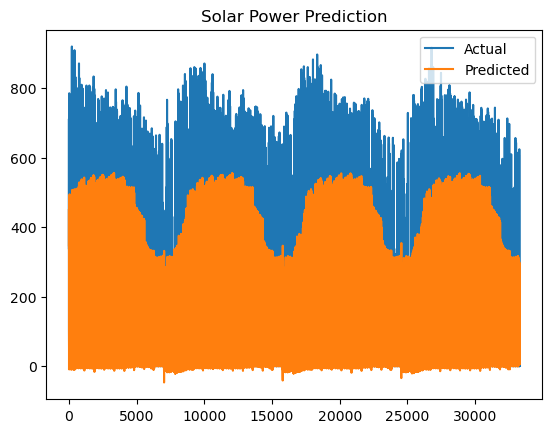

In [89]:
y_pred_scaled = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_actual = y_scaler.inverse_transform(y_test)

# Optional: compare
import matplotlib.pyplot as plt

plt.plot(y_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Solar Power Prediction")
plt.show()

In [90]:
lstm_mae = mean_absolute_error(y_actual, y_pred)
lstm_rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
lstm_r2 = r2_score(y_actual, y_pred)
print(f"LSTM MAE: {lstm_mae:.4f}")
print(f"LSTM RMSE: {lstm_rmse:.4f}")
print(f"LSTM R²: {lstm_r2:.4f}")

LSTM MAE: 71.7698
LSTM RMSE: 127.3381
LSTM R²: 0.6851
